## Uber Ride Sharing Data
#### Name: Aniruddha Indurkar
#### Date: 19/05/2019

Environment: Python 3.6.3 and Jupyter notebook Libraries used

* numpy
* Seaborn
* matplotlib
* Pandas
* networkx - Implementing the Dijkstra's algorithm for shortest path
* Datetime


The dataset is about Uber Ridesharing data in Victoria, Australia. We explore the three given files in the data and explore all the possible errors in the data.


In [1]:
## Importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import networkx as nx
import datetime

### Importing all the data sets provided

In [2]:
# Importing the required files
dirty_data = pd.read_csv("29389429_dirty_data.csv")
outliers_data = pd.read_csv("29389429_outliers.csv")
missing_data = pd.read_csv("29389429_missing_value.csv")

# Importing the nodes and edges files
edges = pd.read_csv('edges.csv', sep=',')
nodes = pd.read_csv('nodes.csv', sep=',')

### Working on the dirty data file provided

In [3]:
## Head of the data files
dirty_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438.0,2018-07-05,18:49:22,1499.76,19:14:21,14.20
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2670.2,2018-04-13,06:45:07,667.92,6:56:14,74.00
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42346.1,2018-04-10,10:36:41,10170.36,13:26:11,13.24
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10704.8,2018-06-06,13:02:45,2735.16,13:48:20,11.60
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616.0,2018-04-11,08:28:12,10213.02,11:18:25,41.02


We rename the "Unnamed: 0" column to Id column as provided in the specification in the file

In [4]:
### Renaming the columns
dirty_data.rename(columns={"Unnamed: 0":"Id"},inplace=True)
dirty_data.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438.0,2018-07-05,18:49:22,1499.76,19:14:21,14.20
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2670.2,2018-04-13,06:45:07,667.92,6:56:14,74.00
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42346.1,2018-04-10,10:36:41,10170.36,13:26:11,13.24
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10704.8,2018-06-06,13:02:45,2735.16,13:48:20,11.60
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616.0,2018-04-11,08:28:12,10213.02,11:18:25,41.02


In [5]:
## Describing the data
dirty_data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.671329,4.972028,5.244755,-36.518540,144.931095,-36.523028,144.935954,16340.069580,4238.713147,75.532517
std,0.788302,2.562740,2.555261,9.957232,0.104231,9.950209,0.111151,17020.057796,4126.268792,206.494108
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,460.000000,117.300000,2.930000
25%,0.000000,3.000000,3.000000,-37.823775,144.925584,-37.823602,144.927467,5498.000000,1393.290000,12.282500
50%,0.000000,5.000000,5.000000,-37.813339,144.950435,-37.814544,144.972827,8564.000000,2424.540000,17.115000
75%,1.000000,7.000000,8.000000,-37.804925,144.987913,-37.806197,144.996284,15151.000000,4911.600000,27.805000
max,3.000000,9.000000,9.000000,38.110916,145.046450,38.110916,145.046450,51061.000000,13204.980000,1278.010000


### Latitude error
We observe that the latitude values have a mean in a negative value whereas there is a maximum value which is not in sync with the other latitude values.

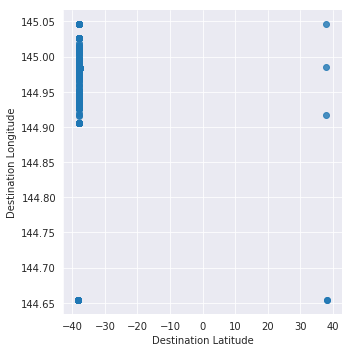

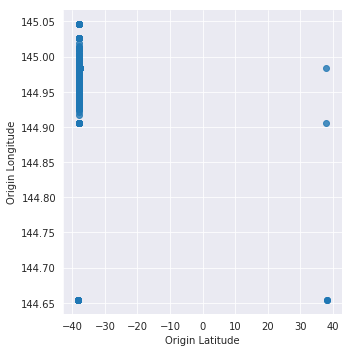

In [6]:
## We plot the values observed on a scatter plot
sns.set_style(style='darkgrid')
sns.lmplot("Destination Latitude","Destination Longitude",data=dirty_data,scatter=True,fit_reg=False)
sns.lmplot("Origin Latitude","Origin Longitude",data=dirty_data,scatter=True,fit_reg=False)


 We clearly see that there are outliers in the files. We check the count and the plausible errors in the file

In [7]:
## Grouping the data and checking the plausible error
dirty_data.groupby("Origin Latitude").count().tail(10)

,Id,Uber Type,Origin Region,Destination Region,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
Origin Latitude,,,,,,,,,,,,,
-37.790818,4,4,4,4,4,4,4,4,4,4,4,4,4
-37.790797,5,5,5,5,5,5,5,5,5,5,5,5,5
-37.788259,1,1,1,1,1,1,1,1,1,1,1,1,1
-37.787442,6,6,6,6,6,6,6,6,6,6,6,6,6
-37.787433,4,4,4,4,4,4,4,4,4,4,4,4,4
-37.773845,7,7,7,7,7,7,7,7,7,7,7,7,7
-37.773803,4,4,4,4,4,4,4,4,4,4,4,4,4
37.773803,1,1,1,1,1,1,1,1,1,1,1,1,1
37.861835,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
## Grouping the data and checking the plausible error
dirty_data.groupby("Destination Latitude").count().tail(10)

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
Destination Latitude,,,,,,,,,,,,,
-37.790818,3,3,3,3,3,3,3,3,3,3,3,3,3
-37.790797,9,9,9,9,9,9,9,9,9,9,9,9,9
-37.787442,6,6,6,6,6,6,6,6,6,6,6,6,6
-37.787433,7,7,7,7,7,7,7,7,7,7,7,7,7
-37.773845,5,5,5,5,5,5,5,5,5,5,5,5,5
-37.773803,4,4,4,4,4,4,4,4,4,4,4,4,4
37.815834,1,1,1,1,1,1,1,1,1,1,1,1,1
37.818725,1,1,1,1,1,1,1,1,1,1,1,1,1
37.825010,1,1,1,1,1,1,1,1,1,1,1,1,1


The errors are semantic and hence we change the Latitude and longitude to negative values. Since, we are in the southern hemisphere we should have values that are negative.

The below code is referenced from the site url:
* Title: Pandas: Conditionally replace values based on other columns values
* URL: https://stackoverflow.com/questions/52224142/pandas-conditionally-replace-values-based-on-other-columns-values

In [9]:
## Correcting the values greater than zero as we are in southern hemisphere
dirty_data["Origin Latitude"]=np.where(dirty_data["Origin Latitude"]>0,-1*dirty_data["Origin Latitude"],dirty_data["Origin Latitude"])
dirty_data["Destination Latitude"]=np.where(dirty_data["Destination Latitude"]>0,-1*dirty_data["Destination Latitude"],dirty_data["Destination Latitude"])


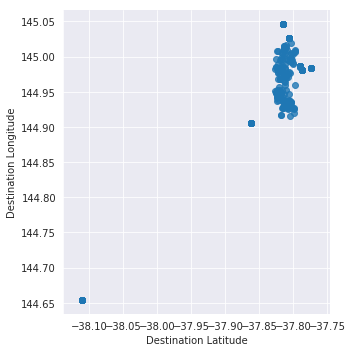

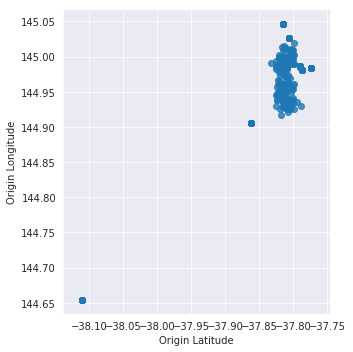

In [10]:
## We plot the values observed on a scatter plot
sns.set_style(style='darkgrid')
sns.lmplot("Destination Latitude","Destination Longitude",data=dirty_data,scatter=True,fit_reg=False)
sns.lmplot("Origin Latitude","Origin Longitude",data=dirty_data,scatter=True,fit_reg=False)


### Still, we observe few values that look like outliers. However, on confirming these values are coordinates to the places in Melbourne

### Checking the date column in pandas data frame

The below code is referenced from the site url:
* Title: Python3 Date Validation
* URL: https://stackoverflow.com/questions/50648096/python3-date-validation
* Date Retrieved: 18/05/2019

In [11]:
def validate(date_text,i):
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
    except:
        print(str(i)+": "+str(date_text))

In [12]:
for i in range(286):
    validate(dirty_data.iloc[i,9],i)

181: 2018-18-02
185: 2018-25-03
188: 2018-14-02
189: 2018-14-03
193: 2018-17-06
197: 2018-19-04
198: 2018-23-03
200: 2018-06-31
204: 2018-02-30
205: 2018-04-31
206: 2018-06-31
212: 2018-06-31
213: 2018-06-31
216: 2018-06-31
217: 2018-04-31
218: 2018-06-31
221: 2018-06-31


#### Departure date has semantic errors as the month column has values more than 12 as well as we find that some days are not available in the calender as 30th of February.

* We manually change the values to the nearest day or the last day of the month for the days that are not available.
* Also, we swap the months with the dates as the date seems to be wrongly formated

In [13]:
## Fixing the errors of wrong calendar date
dirty_data["Departure Date"]=np.where(dirty_data["Departure Date"]=="2018-06-31",
                                      "2018-06-30",dirty_data["Departure Date"])
dirty_data["Departure Date"]=np.where(dirty_data["Departure Date"]=="2018-04-31",
                                      "2018-04-30",dirty_data["Departure Date"])
dirty_data["Departure Date"]=np.where(dirty_data["Departure Date"]=="2018-02-30",
                                      "2018-02-28",dirty_data["Departure Date"])

In [14]:
# Manipulating the string we require
reformat=dirty_data["Departure Date"].str[:5]+dirty_data["Departure Date"].str[8:]+\
"-"+dirty_data["Departure Date"].str[5:7]

dirty_data["Departure Date"]=np.where(dirty_data["Departure Date"].str[5:7].astype(int)>12,
                                      reformat,dirty_data["Departure Date"])

In [15]:
for i in range(286):
    validate(dirty_data.iloc[i,9],i)
## We receive no output hence the error is fixed

In [16]:
## Inspecting the data further
dirty_data["Uber Type"].unique()

array([1, 2, 0, 3])

### Uber type Error

According to the specifications:
"A categorical attribute for the type of the journey namely Uber pool, Uberx, Uber black"

Thus, there are only 3 types of Uber but we observe 4 cateogories.

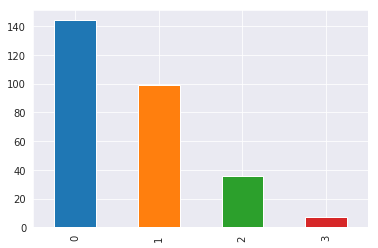

In [17]:
pd.value_counts(dirty_data['Uber Type']).plot.bar()

We expect Uber black (Uber Type "2") to be low as they are luxury cars. Hence, Uber Type "3" is not a valid Uber type. We further inspect the data and identify the data.

In [18]:
dirty_data[dirty_data["Uber Type"]==2].head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2670.2,2018-04-13,06:45:07,667.92,6:56:14,74.00
11,ID5854409363,2,5,3,-37.806296,144.928254,-37.823122,144.989200,6263.0,2018-07-25,20:43:57,1601.64,21:10:38,172.00
35,ID5866766730,2,5,1,-37.811726,144.929737,-37.810318,144.972741,5136.0,2018-05-21,09:46:44,1290.36,10:08:14,133.46
48,ID5502303409,2,9,4,-38.110916,144.654173,-37.813586,145.012066,48228.0,2018-03-19,07:15:16,11594.40,10:28:30,1108.48
56,ID5612180176,2,7,3,-37.861835,144.905716,-37.811771,144.974730,8809.0,2018-03-06,09:58:58,2947.08,10:48:05,289.97


In [19]:
dirty_data[dirty_data["Uber Type"]==1].head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438.0,2018-07-05,18:49:22,1499.76,19:14:21,14.20
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616.0,2018-04-11,08:28:12,10213.02,11:18:25,41.02
8,ID3716389727,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15157.3,2018-05-11,13:06:37,4911.60,14:28:28,26.06
13,ID3479452150,1,8,9,-37.807202,145.026637,-38.110916,144.654173,49777.0,2018-02-14,15:59:55,12069.78,19:21:04,55.16
14,ID3606598825,1,6,8,-37.790818,144.985793,-37.815834,145.046450,7471.0,2018-05-06,22:00:10,2192.70,22:36:42,26.64


### We observe that the Uber Type "1" always start with pattern "ID3xxxxxxxx". Similarly, Uber Type "2" starts with "ID5xxxxxxxx". Thus, we create a new column including this pattern and

In [20]:
dirty_data["Pattern"]=dirty_data["Id"].str[:3]

## Group by to obersve the pattern
dirty_data.groupby(["Pattern","Uber Type"]).count()

Id  Origin Region  Destination Region  Origin Latitude  \
Pattern Uber Type                                                            
ID1     0          144            144                 144              144   
        1            1              1                   1                1   
        3            1              1                   1                1   
ID3     1           97             97                  97               97   
        2            1              1                   1                1   
        3            2              2                   2                2   
ID5     1            1              1                   1                1   
        2           35             35                  35               35   
        3            4              4                   4                4   

                   Origin Longitude  Destination Latitude  \
Pattern Uber Type                                           
ID1     0                       144                   144   
        1                         1                     1   
        3                         1                     1   
ID3     1                        97                    97   
        2                         1                     1   
        3                         2                     2   
ID5     1                         1                     1   
        2                        35                    35   
        3                         4                     4   

                   Destination Longitude  Journey Distance(m)  Departure Date  \
Pattern Uber Type                                                               
ID1     0                            144                  144             144   
        1                              1                    1               1   
        3                              1                    1               1   
ID3     1                             97                   97              97   
        2                              1                    1               1   
        3                              2                    2               2   
ID5     1                              1                    1               1   
        2                             35                   35              35   
        3                              4                    4               4   

                   Departure Time  Travel Time(s)  Arrival Time  Fare$  
Pattern Uber Type                                                       
ID1     0                     144             144           144    144  
        1                       1               1             1      1  
        3                       1               1             1      1  
ID3     1                      97              97            97     97  
        2                       1               1             1      1  
        3                       2               2             2      2  
ID5     1                       1               1             1      1  
        2                      35              35            35     35  
        3                       4               4             4      4

 ### We go for modal imputation for the Uber Type "3". We assign the ID the values with highest frequency for the observed pattern
 
We still observe some values as misclassified for Uber Types 0,1,2. But we need further evidence to conclude that there are certain values misclassified. 
We move ahead and check the other features and then come back to decide if these misclassified or just exceptions.

In [21]:
## Modal imputation of the values given
dirty_data.loc[(dirty_data["Pattern"]=="ID5") & (dirty_data["Uber Type"]==3),"Uber Type"]=2
dirty_data.loc[(dirty_data["Pattern"]=="ID3") & (dirty_data["Uber Type"]==3),"Uber Type"]=1
dirty_data.loc[(dirty_data["Pattern"]=="ID1") & (dirty_data["Uber Type"]==3),"Uber Type"]=0

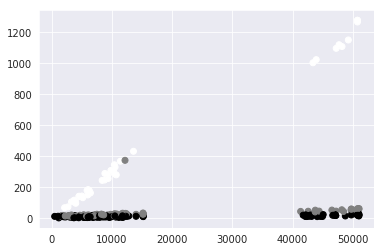

In [22]:
plt.scatter(dirty_data["Journey Distance(m)"],dirty_data["Fare$"],
            c=dirty_data["Uber Type"],cmap="gray")

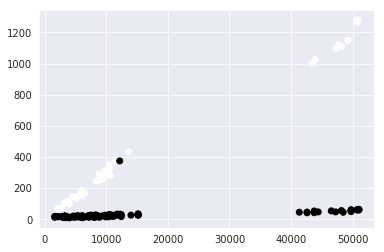

In [23]:
df_tmp = dirty_data[dirty_data['Uber Type'] != 0]
plt.scatter(df_tmp["Journey Distance(m)"],df_tmp["Fare$"],
            c=df_tmp["Uber Type"],cmap="gray")


### We can confirm from the above plots that the two Uber types are misclassified and we immediately correct them

In [24]:
## Imputing the Uber Types
dirty_data.loc[(dirty_data["Pattern"]=="ID1") & (dirty_data["Uber Type"]==1),"Uber Type"]=0
dirty_data.loc[(dirty_data["Pattern"]=="ID3") & (dirty_data["Uber Type"]==2),"Uber Type"]=1
dirty_data.loc[(dirty_data["Pattern"]=="ID5") & (dirty_data["Uber Type"]==1),"Uber Type"]=2


### Journey Distance

To calculate the journey distance we apply the Dijkstra's Algorithm

Procedure:
* We first join the data with the nodes file to obtain the nodes from latitude and longitude
* We then have the Origin and the destination nodes in the dataframe.
* Then we apply the dijkstra's algorithm and calculate the distance from the edges files

In [25]:
## This should be run only once or other wise many different columns will pop up

## First we join the nodes file with the data in order to get the nodes in the dataframe
## We take the left join in order to include all the nodes
## For origin node
dirty_data1 = pd.merge(dirty_data,nodes , left_on=['Origin Latitude',"Origin Longitude"],
                    right_on=["lat","lon"], how='left')
dirty_data1.drop(["lat","lon"],axis=1,inplace=True)
dirty_data1.rename(columns={"Unnamed: 0":"origin_node"},inplace=True)

## For the destination node
dirty_data1 = pd.merge(dirty_data1,nodes , left_on=['Destination Latitude',"Destination Longitude"],
                      right_on=["lat","lon"], how='left')
dirty_data1.drop(["lat","lon"],axis=1,inplace=True)
dirty_data1.rename(columns={"Unnamed: 0":"destination_node"},inplace=True)


In [26]:
dirty_data1.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438.0,2018-07-05,18:49:22,1499.76,19:14:21,14.20,ID3,206204610,575434478
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2670.2,2018-04-13,06:45:07,667.92,6:56:14,74.00,ID5,2481930364,304700558
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42346.1,2018-04-10,10:36:41,10170.36,13:26:11,13.24,ID1,5002706670,589763586
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10704.8,2018-06-06,13:02:45,2735.16,13:48:20,11.60,ID1,1889485053,2455254499
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616.0,2018-04-11,08:28:12,10213.02,11:18:25,41.02,ID3,634777969,5002706670


### Implementing the Dijkstra Algorithm
The below code is referenced from the material provided in the lecture.

In [27]:
## Applying the networkx on the edges list
G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

dirty_data1['dijkstra_dist'] = 0.0
dirty_data1['dist_diff'] = 0.0
for i, row in dirty_data1.iterrows():
    src = row['origin_node']
    des = row['destination_node']
    dist = nx.dijkstra_path_length(G,source=src, target=des, weight='distance(m)')
    dirty_data1.loc[i, 'dijkstra_dist'] = dist
    dirty_data1.loc[i, 'dist_diff'] = dist - row['Journey Distance(m)']
#     print(dist)
dirty_data1.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node,dijkstra_dist,dist_diff
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438.0,2018-07-05,18:49:22,1499.76,19:14:21,14.20,ID3,206204610,575434478,6438.0,0.0
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2670.2,2018-04-13,06:45:07,667.92,6:56:14,74.00,ID5,2481930364,304700558,2669.0,-1.2
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42346.1,2018-04-10,10:36:41,10170.36,13:26:11,13.24,ID1,5002706670,589763586,42337.0,-9.1
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10704.8,2018-06-06,13:02:45,2735.16,13:48:20,11.60,ID1,1889485053,2455254499,10698.0,-6.8
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616.0,2018-04-11,08:28:12,10213.02,11:18:25,41.02,ID3,634777969,5002706670,42616.0,0.0


In [28]:
## Total difference in the distances obtained
dirty_data1['dist_diff'].value_counts()

 0.0    281
-1.2      1
-9.1      1
-6.8      1
-6.3      1
-6.5      1
Name: dist_diff, dtype: int64

Thus there are distances that are not calculated accurately. Hence, we impute the values accordingly.

In [29]:
### Checking whether the journey distance provided matches with the calculated
dirty_data1["Journey Distance(m)"]=np.where(dirty_data1["Journey Distance(m)"]!=0,
                                      dirty_data1["dijkstra_dist"],dirty_data1["Departure Date"])

In [30]:
## Checking the imputed values
dirty_data1[dirty_data1["Journey Distance(m)"]!=dirty_data1["dijkstra_dist"]]

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node,dijkstra_dist,dist_diff


### Travel Time

We take all the shortest paths and calculate the travel time given the paths for each origin and the destination node.


In [31]:
## Function to return travel time provided
def traveltime(path, edges):

    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)

    return tt

In [32]:
travel_time_list=[]
for i in range(286):
    p=nx.dijkstra_path(G,source=dirty_data1.loc[i,"origin_node"], 
                       target=dirty_data1.loc[i,"destination_node"], weight='distance(m)')
    
    travel_time_list.append(round(traveltime(p,edges),2))

## Difference in the time path travelled
dirty_data1["dtime"]=travel_time_list

In [33]:
dirty_data1.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node,dijkstra_dist,dist_diff,dtime
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438,2018-07-05,18:49:22,1499.76,19:14:21,14.20,ID3,206204610,575434478,6438.0,0.0,1499.76
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2669,2018-04-13,06:45:07,667.92,6:56:14,74.00,ID5,2481930364,304700558,2669.0,-1.2,667.92
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42337,2018-04-10,10:36:41,10170.36,13:26:11,13.24,ID1,5002706670,589763586,42337.0,-9.1,10170.36
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,2018-06-06,13:02:45,2735.16,13:48:20,11.60,ID1,1889485053,2455254499,10698.0,-6.8,2735.16
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616,2018-04-11,08:28:12,10213.02,11:18:25,41.02,ID3,634777969,5002706670,42616.0,0.0,10213.02


### We calculate the difference between the given time and the calculated time to check for errors

In [34]:
## Calculating the difference between the given time and calculated tiem
dirty_data1["time_diff"]=dirty_data1["Travel Time(s)"]-dirty_data1["dtime"]
dirty_data1=dirty_data1.round({"time_diff":2})

In [35]:
## Difference above the permissible range is filtered
dirty_data1[(dirty_data1["time_diff"]<-1)|(dirty_data1["time_diff"]>1)]

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node,dijkstra_dist,dist_diff,dtime,time_diff
33,ID3235424352,1,2,4,-37.816572,144.937720,-37.773845,144.983689,7173,2018-04-21,...,1648.38,8:16:18,12.29,ID3,6021320963,2455254499,7173.0,0.0,1675.32,-26.94
71,ID1924149089,0,5,9,-37.804815,144.925738,-38.110916,144.654173,44203,2018-03-24,...,10622.80,10:18:41,18.23,ID1,581736616,5002706670,44203.0,0.0,10591.80,31.00
72,ID1570836934,0,2,3,-37.811125,144.936956,-37.826248,144.985727,5289,2018-01-12,...,1247.12,21:56:33,12.32,ID1,506045571,575553617,5289.0,0.0,1269.12,-22.00
73,ID1754750546,0,4,6,-37.805485,145.004460,-37.773803,144.983647,9568,2018-02-21,...,3044.42,7:25:31,5.85,ID1,6133672106,2455254505,9568.0,0.0,2955.42,89.00
74,ID3292199442,1,6,2,-37.787442,144.980409,-37.818492,144.948613,5307,2018-06-19,...,1425.16,0:15:02,22.51,ID3,2204638268,92139159,5307.0,0.0,1340.16,85.00
77,ID3995440640,1,5,6,-37.804925,144.934889,-37.790818,144.985793,6134,2018-07-05,...,1682.66,1:19:11,21.75,ID3,30942440,4307007287,6134.0,0.0,1644.66,38.00
78,ID1671457862,0,1,8,-37.799207,144.961314,-37.807202,145.026637,6333,2018-04-01,...,1721.82,18:19:26,14.67,ID1,367098724,304700558,6333.0,0.0,1640.82,81.00
85,ID1714701450,0,3,8,-37.821164,144.978118,-37.815834,145.046450,7080,2018-04-17,...,2109.34,16:04:43,11.11,ID1,5402876214,1889485053,7080.0,0.0,2084.34,25.00
87,ID1138390109,0,6,9,-37.790797,144.985865,-38.110916,144.654173,47193,2018-01-04,...,11577.62,3:03:07,19.39,ID1,4307007286,5002706670,47193.0,0.0,11530.62,47.00
88,ID1638144992,0,8,5,-37.815834,145.046450,-37.805420,144.928230,11131,2018-01-04,...,3175.28,7:04:19,6.08,ID1,1889485053,581709069,11131.0,0.0,3179.28,-4.00


In [36]:
## Imputing the correct value
dirty_data1["Travel Time(s)"]=np.where((dirty_data1["time_diff"]<-1)|(dirty_data1["time_diff"]>1),
                                      dirty_data1["dtime"],dirty_data1["Travel Time(s)"])

In [37]:
## Verifying the imputed values
dirty_data1["time_diff"]=dirty_data1["Travel Time(s)"]-dirty_data1["dtime"]
dirty_data1=dirty_data1.round({"time_diff":2})
dirty_data1[dirty_data1["time_diff"]!=0]

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node,dijkstra_dist,dist_diff,dtime,time_diff
27,ID3727096732,1,3,2,-37.773845,144.983689,-37.822310,144.946875,7131,2018-01-14,...,1593.96,23:35:34,23.96,ID3,2455254499,5682688503,7131.0,0.0,1593.84,0.12
35,ID5866766730,2,5,1,-37.811726,144.929737,-37.810318,144.972741,5136,2018-05-21,...,1290.36,10:08:14,133.46,ID5,4893634024,2189497243,5136.0,0.0,1290.06,0.30
144,ID5807424032,2,6,1,-37.773803,144.983647,-37.820953,144.947581,9811,2018-07-13,...,2955.60,0:03:51,309.18,ID5,2455254505,310957465,9811.0,0.0,2955.48,0.12
165,ID3731382342,1,1,6,-37.815088,144.952335,-37.787442,144.980409,4614,2018-03-08,...,1212.30,22:23:00,18.63,ID3,1492150970,2204638268,4614.0,0.0,1212.54,-0.24
243,ID1580713748,0,9,6,-38.110916,144.654173,-37.790797,144.985865,47193,2018-07-20,...,11535.78,17:36:12,18.26,ID1,5002706670,4307007286,47193.0,0.0,11536.02,-0.24


## Origin Region

In [38]:
dirty_data1.groupby(dirty_data1["Origin Region"]).count()

,Id,Uber Type,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Pattern,origin_node,destination_node,dijkstra_dist,dist_diff,dtime,time_diff
Origin Region,,,,,,,,,,,,,,,,,,,,
1,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
2,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
3,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
4,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
5,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
6,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
7,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
8,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
9,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


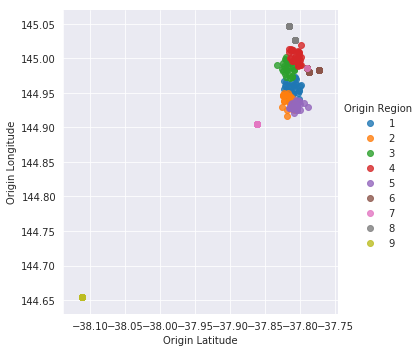

In [39]:
## Origin Region borders
sns.lmplot("Origin Latitude","Origin Longitude",data=dirty_data,hue="Origin Region"
             ,scatter=True,fit_reg=False)

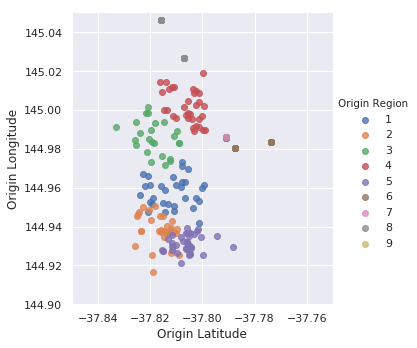

In [40]:
### Plotting to check the regions
sns.set(rc={'figure.figsize':(20,16)})
sns.set_style(style='darkgrid')
g=sns.lmplot("Origin Latitude","Origin Longitude",data=dirty_data,hue="Origin Region"
             ,scatter=True,fit_reg=False)

g.set(xlim=(-37.85,-37.75))
g.set(ylim=(144.90,145.05))


AxesSubplot(0.357997,0.687344;0.296637x0.296198)


<Figure size 720x720 with 0 Axes>

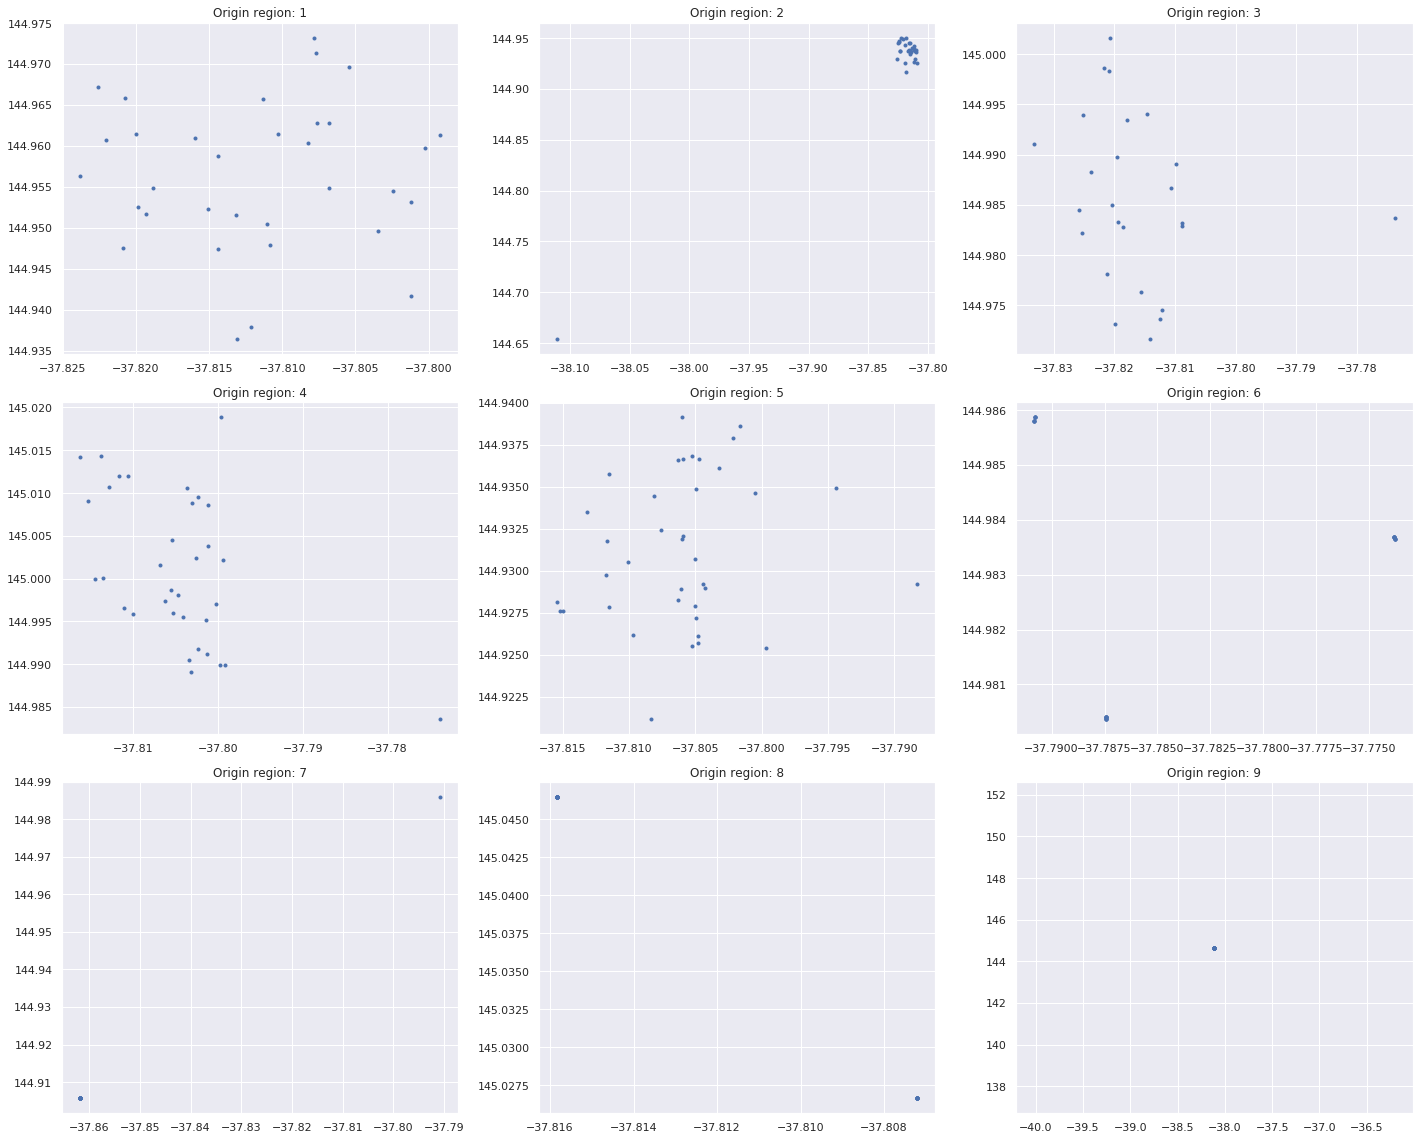

In [41]:
plt.figure(figsize=(10,10))
import matplotlib.ticker as mticker
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()
df=dirty_data1
k=1
print(axes[0][1])
for i in range(3):
    fig.tight_layout()
    for j in range(3):
        axes[i][j].set_title('Origin region: '+str(k))
        df=dirty_data1[dirty_data1["Origin Region"]==k]
        fig.tight_layout()
        axes[i][j].plot(df["Origin Latitude"],df["Origin Longitude"], '.')
        axes[i][j].ticklabel_format(useOffset=False, style='plain')
        k+=1


### To fix the "Origin region" error we go ahead with KNN algorithm.

* We take 3 nearest Neighbours to classify our data initially and then we predict our origin Region on the same data set.
* We do it similarly for destination region.
* The plots are used to confirm the changes made in the dataset.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(dirty_data1.iloc[:,4:6],dirty_data1["Origin Region"])
pred = knn.predict(dirty_data1.iloc[:,4:6])
dirty_data1["Origin pred"]=pred

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


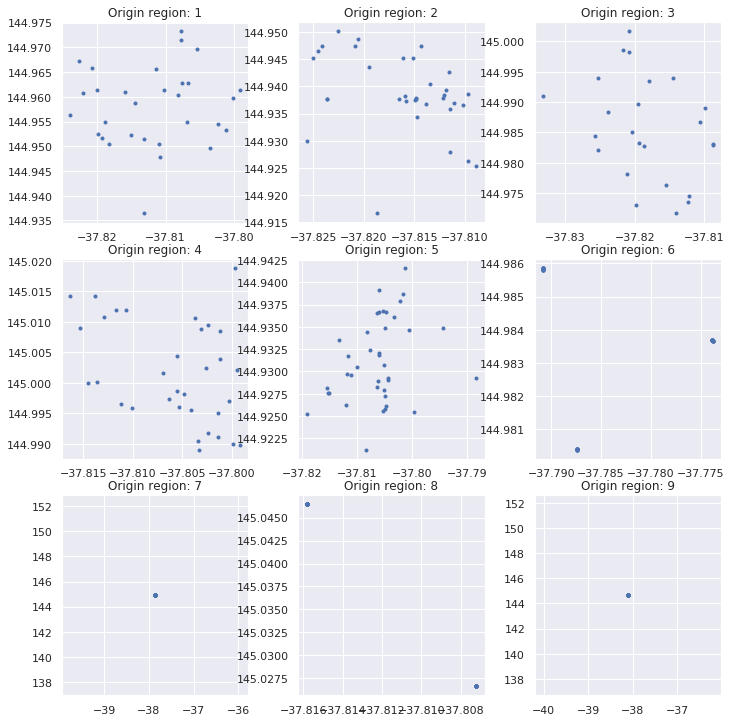

In [43]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

import matplotlib.ticker as mticker
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()
df=dirty_data1
k=1

for i in range(3):
    
    for j in range(3):
        axes[i][j].set_title('Origin region: '+str(k))
        df=dirty_data1[dirty_data1["Origin pred"]==k]
        
        axes[i][j].plot(df["Origin Latitude"],df["Origin Longitude"], '.')
        axes[i][j].ticklabel_format(useOffset=False, style='plain')
        k+=1


In [44]:
pd.value_counts(dirty_data1['Origin Region'])

5    38
7    36
4    34
2    33
1    33
9    30
8    29
6    28
3    25
Name: Origin Region, dtype: int64

In [45]:
## Changes made by KNN algorithm
pd.value_counts(dirty_data1['Origin pred'])

5    39
7    35
2    34
4    33
9    31
6    31
1    30
8    29
3    24
Name: Origin pred, dtype: int64

### Imputing the changes made by the algorithm

In [46]:
## Imputing the changes made by the algorithm
dirty_data1["Origin Region"]=dirty_data1["Origin pred"]

### Similarly, we do the changes for Destination region

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(dirty_data1.iloc[:,6:8],dirty_data1["Destination Region"])
pred = knn.predict(dirty_data1.iloc[:,6:8])
dirty_data1["Destination pred"]=pred

In [48]:
## Provided value counts
pd.value_counts(dirty_data1['Destination Region'])

8    45
9    33
6    33
2    33
3    32
5    31
4    31
7    26
1    22
Name: Destination Region, dtype: int64

In [49]:
## New region counts
pd.value_counts(dirty_data1['Destination pred'])

8    45
5    35
3    35
9    34
6    34
2    32
4    29
7    26
1    16
Name: Destination pred, dtype: int64

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


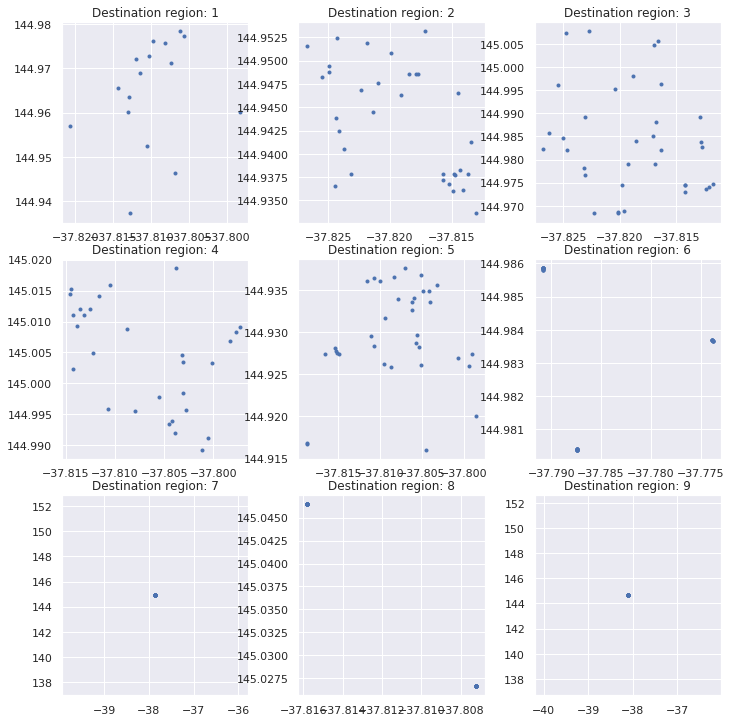

In [50]:
## CHecking the changes in the regions made
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

import matplotlib.ticker as mticker
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()
df=dirty_data1
k=1

for i in range(3):
    
    for j in range(3):
        axes[i][j].set_title('Destination region: '+str(k))
        df=dirty_data1[dirty_data1["Destination pred"]==k]
        
        axes[i][j].plot(df["Destination Latitude"],df["Destination Longitude"], '.')
        axes[i][j].ticklabel_format(useOffset=False, style='plain')
        k+=1


In [51]:
dirty_data1["Destination Region"]=dirty_data1["Destination pred"]

In [52]:
dirty_data1.to_csv("dirty_data1.csv",index=False)

## Departure and Travel Time

The below code is referenced from site:
* Title: Convert date to datetime in Python
* URL: https://stackoverflow.com/questions/1937622/convert-date-to-datetime-in-python
* Date Retrieved: 18/05/2019

We take the following steps:
* The Departure time and arrival time are converted into time format
* Then we calculate the difference between arrival time and departure time.
* If the difference is negative, then we eyeball the values. There will be 2 scenarios:
1. The journey starting near midnight will continue till next day and the difference will be very large and negative
2. If the arrival time is less than departure time then we expect negative values

For the later scenario we swap the values and fix the departure time.

### We then impute the arrival time as the Departure time + Travel Time(s)

In [53]:
## Converting the columns to date time format
dirty_data1['Departure Time'] =  pd.to_datetime(dirty_data1['Departure Time'], format='%H:%M:%S')
dirty_data1['Arrival Time'] =  pd.to_datetime(dirty_data1['Arrival Time'], format='%H:%M:%S')

## Checking the difference between actual time difference
dirty_data1["travel time diff"]=dirty_data1["Arrival Time"]-dirty_data1["Departure Time"]

In [54]:
## Converting the time travel into seconds
dirty_data1["travel_timed"]=dirty_data1["travel time diff"].dt.total_seconds()

## Changing the datatype to numeric
dirty_data1["travel_timed"]=dirty_data1["travel_timed"].astype(float)

## Condition when the arrival time is less than the departure time
tmp=dirty_data1[dirty_data1["travel_timed"].astype(int)<0]

tmp[["travel_timed","Travel Time(s)","Departure Time","Arrival Time"]]

,travel_timed,Travel Time(s),Departure Time,Arrival Time
7,-76066.0,10334.04,1900-01-01 23:32:29,1900-01-01 02:24:43
45,-73196.0,13204.98,1900-01-01 21:22:53,1900-01-01 01:02:57
60,-85575.0,825.54,1900-01-01 23:59:39,1900-01-01 00:13:24
62,-73227.0,13173.36,1900-01-01 23:58:34,1900-01-01 03:38:07
74,-85060.0,1340.16,1900-01-01 23:52:42,1900-01-01 00:15:02
87,-74870.0,11530.62,1900-01-01 23:50:57,1900-01-01 03:03:07
97,-79375.0,915.24,1900-01-01 22:58:49,1900-01-01 00:55:54
110,-69827.0,4917.48,1900-01-01 23:31:39,1900-01-01 04:07:52
113,-85600.0,800.22,1900-01-01 23:56:06,1900-01-01 00:09:26
144,-83445.0,2955.60,1900-01-01 23:14:36,1900-01-01 00:03:51


### Here, we observe that some journey begin near to midnight hence they have a negative difference.
### However, some of the values seem to be interchanged, as they are semantic errors.

In [55]:
## Giving the condition to filter out the data
dirty_data1["dt"]=(-1*dirty_data1["travel_timed"]-dirty_data1["Travel Time(s)"])

## Creating a third column to swap the values
dirty_data1["tmp_time"]=dirty_data1["Departure Time"]

## Swaping the values on the condition
dirty_data1["Departure Time"]=np.where((dirty_data1["dt"]>-1)&(dirty_data1["dt"]<1),
         dirty_data1["Arrival Time"],dirty_data1["Departure Time"])
dirty_data1["Arrival Time"]=np.where((dirty_data1["dt"]>-1)&(dirty_data1["dt"]<1),
         dirty_data1["tmp_time"],dirty_data1["Arrival Time"])


In [56]:
dirty_data=dirty_data1.iloc[:,0:14]
dirty_data.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438,2018-07-05,1900-01-01 18:49:22,1499.76,1900-01-01 19:14:21,14.20
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2669,2018-04-13,1900-01-01 06:45:07,667.92,1900-01-01 06:56:14,74.00
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42337,2018-04-10,1900-01-01 10:36:41,10170.36,1900-01-01 13:26:11,13.24
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,2018-06-06,1900-01-01 13:02:45,2735.16,1900-01-01 13:48:20,11.60
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616,2018-04-11,1900-01-01 08:28:12,10213.02,1900-01-01 11:18:25,41.02


In [57]:
## Adding departure time to arrival time to fix it
dirty_data1['Arrival Time'] =dirty_data1['Departure Time']+ pd.to_timedelta(round(dirty_data1['Travel Time(s)'])
                                                                            , unit='s')

In [58]:
## Converting the time in the orignal time format
dirty_data1["Departure Time"]=dirty_data1["Departure Time"].astype(str).str[11:]
dirty_data1["Arrival Time"]=dirty_data1["Arrival Time"].astype(str).str[11:]


In [59]:
### Replacing with original data frame
dirty_data_cleaned=dirty_data1.iloc[:,0:14]


In [60]:
dirty_data_cleaned.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3114825351,1,5,3,-37.815431,144.928168,-37.818580,144.984077,6438,2018-07-05,18:49:22,1499.76,19:14:22,14.20
1,ID5334742706,2,4,8,-37.805511,144.998656,-37.807202,145.026637,2669,2018-04-13,06:45:07,667.92,06:56:15,74.00
2,ID1849743912,0,9,2,-38.110916,144.654173,-37.821839,144.951834,42337,2018-04-10,10:36:41,10170.36,13:26:11,13.24
3,ID1450829119,0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,2018-06-06,13:02:45,2735.16,13:48:20,11.60
4,ID3497343760,1,2,9,-37.814923,144.937565,-38.110916,144.654173,42616,2018-04-11,08:28:12,10213.02,11:18:25,41.02


### Writing the output file

In [61]:
## Writing the file
dirty_data_cleaned.to_csv("29389429_dirty_data_solution.csv", sep=',',index=False)

# Missing Data File

* We first check the missing data file.
* Impute the values according to the observed pattern for Uber Type
* For imputing the fare values, we build 3 Linear models using the given parameters and impute the values according to the Uber Type

In [62]:
missing_data.head()


,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1323200164,0.0,5,8,-37.800530,144.934364,-37.815834,145.046450,12299.0,2018-01-14,18:04:04,3382.80,19:00:26,15.72
1,ID3469866997,1.0,2,4,-37.817791,144.932188,-37.802798,145.006793,7734.0,2018-03-06,14:40:45,2011.08,15:14:16,17.74
2,ID3432608862,NaN,9,5,-38.110916,144.654173,-37.815116,144.927561,44366.0,2018-02-11,08:34:59,10665.84,11:32:44,53.55
3,ID1773186607,0.0,9,5,-38.110916,144.654173,-37.813246,144.933446,43715.0,2018-01-11,04:30:04,10499.22,7:25:03,26.07
4,ID3420025441,1.0,1,4,-37.815916,144.968887,-37.797445,144.997699,4450.0,2018-05-07,02:51:18,1244.82,3:12:02,22.66


In [63]:
missing_data.loc[:, missing_data.isnull().any()].head()

,Uber Type,Fare$
0,0.0,15.72
1,1.0,17.74
2,NaN,53.55
3,0.0,26.07
4,1.0,22.66


## We observe the null values only for 2 columns, i.e. Uber Type and Fare 

In [64]:
missing_data.loc[missing_data["Uber Type"].isnull(),:].head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
2,ID3432608862,NaN,9,5,-38.110916,144.654173,-37.815116,144.927561,44366.0,2018-02-11,08:34:59,10665.84,11:32:44,53.55
5,ID3393834272,NaN,5,7,-37.810064,144.930506,-37.861835,144.905716,11758.0,2018-03-01,10:20:16,3748.14,11:22:44,19.66
6,ID5251489151,NaN,2,3,-37.817300,144.925797,-37.815984,145.000351,7614.0,2018-02-16,00:25:42,1894.02,0:57:16,165.45
8,ID3637794855,NaN,3,7,-37.809243,144.978357,-37.861835,144.905716,9294.0,2018-02-27,12:15:29,3162.12,13:08:11,25.29
10,ID1968309777,NaN,6,7,-37.790797,144.985865,-37.861835,144.905716,11711.0,2018-07-10,07:42:20,3866.94,8:46:46,9.56


We impute these missing values with the help of pattern we found in dirty data

In [65]:
missing_data.rename(columns={"Unnamed: 0":"Id"},inplace=True)
missing_data["Pattern"]=missing_data["Id"].str[:3]

## Confirming the pattern observed
missing_data.groupby(["Pattern","Uber Type"]).count()

,,Id,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
Pattern,Uber Type,,,,,,,,,,,,,
ID1,0.0,52,52,52,52,52,52,52,52,52,52,52,52,43
ID3,1.0,41,41,41,41,41,41,41,41,41,41,41,41,33
ID5,2.0,12,12,12,12,12,12,12,12,12,12,12,12,9


In [66]:
## Imputing the missing values
missing_data.loc[(missing_data["Uber Type"].isnull()) & (missing_data["Pattern"]=="ID1"),"Uber Type"]=0.0
missing_data.loc[(missing_data["Uber Type"].isnull()) & (missing_data["Pattern"]=="ID3"),"Uber Type"]=1.0
missing_data.loc[(missing_data["Uber Type"].isnull()) & (missing_data["Pattern"]=="ID5"),"Uber Type"]=2.0

## Verifying
missing_data.groupby(["Pattern","Uber Type"]).count()

,,Id,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
Pattern,Uber Type,,,,,,,,,,,,,
ID1,0.0,59,59,59,59,59,59,59,59,59,59,59,59,50
ID3,1.0,51,51,51,51,51,51,51,51,51,51,51,51,43
ID5,2.0,17,17,17,17,17,17,17,17,17,17,17,17,14


### Uber Fare

We add helper columns to the dataset according to the information that is provided in the specification.
Therefore, we add the helper column to classify the time frame and whether the day is weekday or weekend.

In [67]:
missing_data['Departure Time'] =  pd.to_datetime(missing_data['Departure Time'], format='%H:%M:%S')
missing_data['time_frame'] = 10

## Classifying the time frame
for i, row in missing_data.iterrows():
    if pd.to_datetime("1900-01-01 06:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 11:59:59"):
        missing_data.loc[i, 'time_frame'] = 0
    elif pd.to_datetime("1900-01-01 12:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 20:59:59"):
        missing_data.loc[i, 'time_frame'] = 1
    else:
        missing_data.loc[i, 'time_frame'] = 2

In [68]:
missing_data['Departure Date'] =  pd.to_datetime(missing_data['Departure Date'], format='%Y-%m-%d')
missing_data["day"]=missing_data["Departure Date"].dt.dayofweek

missing_data["weekend"]=np.where((missing_data["day"]==6)|(missing_data["day"]==7) ,1,0)

### To improve the model we also include dirty data in order to calculate the Uber Fare

* We calculate the same columns for the cleaned dirty data and append the new data frame to the missing data.
* Then, we split the columns into test and train where the test data will be the columns that include NAs in the fare column

In [69]:
dirty_data_cleaned['Departure Time'] =  pd.to_datetime(missing_data['Departure Time'], format='%H:%M:%S')
dirty_data_cleaned['time_frame'] = 10

## Classifying the time frame
for i, row in dirty_data_cleaned.iterrows():
    if pd.to_datetime("1900-01-01 06:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 11:59:59"):
        dirty_data_cleaned.loc[i, 'time_frame'] = 0
    elif pd.to_datetime("1900-01-01 12:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 20:59:59"):
        dirty_data_cleaned.loc[i, 'time_frame'] = 1
    else:
        dirty_data_cleaned.loc[i, 'time_frame'] = 2

In [70]:
## Calculating the Weekend for the data
dirty_data_cleaned['Departure Date'] =  pd.to_datetime(dirty_data_cleaned['Departure Date'], format='%Y-%m-%d')
dirty_data_cleaned["day"]=dirty_data_cleaned["Departure Date"].dt.dayofweek

## Calculating a new column
dirty_data_cleaned["weekend"]=np.where((dirty_data_cleaned["day"]==6)|(dirty_data_cleaned["day"]==7) ,1,0)


In [71]:
## Appending the new data as the training set
data = dirty_data_cleaned.append(missing_data.iloc[:,missing_data.columns!="Pattern"])
data.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,time_frame,day,weekend
0,ID3114825351,1.0,5,3,-37.815431,144.928168,-37.818580,144.984077,6438,2018-07-05,1900-01-01 18:04:04,1499.76,19:14:22,14.20,1,3,0
1,ID5334742706,2.0,4,8,-37.805511,144.998656,-37.807202,145.026637,2669,2018-04-13,1900-01-01 14:40:45,667.92,06:56:15,74.00,1,4,0
2,ID1849743912,0.0,9,2,-38.110916,144.654173,-37.821839,144.951834,42337,2018-04-10,1900-01-01 08:34:59,10170.36,13:26:11,13.24,0,1,0
3,ID1450829119,0.0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,2018-06-06,1900-01-01 04:30:04,2735.16,13:48:20,11.60,2,2,0
4,ID3497343760,1.0,2,9,-37.814923,144.937565,-38.110916,144.654173,42616,2018-04-11,1900-01-01 02:51:18,10213.02,11:18:25,41.02,2,2,0


In [72]:
## Creating a training data set
u0=data[data["Uber Type"]==0].dropna()
u1=data[data["Uber Type"]==1].dropna()
u2=data[data["Uber Type"]==2].dropna()

In [73]:
## Creating a test data set
u0test=missing_data[(missing_data["Uber Type"]==0)&(missing_data["Fare$"].isna())]
u1test=missing_data[(missing_data["Uber Type"]==1)&(missing_data["Fare$"].isna())]
u2test=missing_data[(missing_data["Uber Type"]==2)&(missing_data["Fare$"].isna())]

### We use Travel Time, Journey Distance, day of the week and the departure time to build our model

In [74]:
## Filtering for the variables to build the model
X0 = u0[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']]
y0 = u0['Fare$']
X1 = u1[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']]
y1 = u1['Fare$']
X2 = u2[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']]
y2 = u2['Fare$']

## Fitting 3 models on different Uber Types

In [75]:
## Fitting linear model for Uber Type
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
## Predicting and Imputing in the data
pred = lm.predict(u2test[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']])
t=0
for i in u2test.index:
    
    missing_data.loc[i,"Fare$"]=pred[t]
    t+=1
    

In [77]:
## Similarly for Uber Type1
lm = LinearRegression()
lm.fit(X1,y1)
pred = lm.predict(u1test[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']])

t=0
for i in u1test.index:

    missing_data.loc[i,"Fare$"]=pred[t]
    t+=1
    

In [78]:
## Likewise for Uber type 0
lm = LinearRegression()
lm.fit(X0,y0)
pred = lm.predict(u0test[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']])

t=0
for i in u0test.index:

    missing_data.loc[i,"Fare$"]=pred[t]
    t+=1
    

In [79]:
missing_data

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Pattern,time_frame,day,weekend
0,ID1323200164,0.0,5,8,-37.800530,144.934364,-37.815834,145.046450,12299.0,2018-01-14,1900-01-01 18:04:04,3382.80,19:00:26,15.720000,ID1,1,6,1
1,ID3469866997,1.0,2,4,-37.817791,144.932188,-37.802798,145.006793,7734.0,2018-03-06,1900-01-01 14:40:45,2011.08,15:14:16,17.740000,ID3,1,1,0
2,ID3432608862,1.0,9,5,-38.110916,144.654173,-37.815116,144.927561,44366.0,2018-02-11,1900-01-01 08:34:59,10665.84,11:32:44,53.550000,ID3,0,6,1
3,ID1773186607,0.0,9,5,-38.110916,144.654173,-37.813246,144.933446,43715.0,2018-01-11,1900-01-01 04:30:04,10499.22,7:25:03,26.070000,ID1,2,3,0
4,ID3420025441,1.0,1,4,-37.815916,144.968887,-37.797445,144.997699,4450.0,2018-05-07,1900-01-01 02:51:18,1244.82,3:12:02,22.660000,ID3,2,0,0
5,ID3393834272,1.0,5,7,-37.810064,144.930506,-37.861835,144.905716,11758.0,2018-03-01,1900-01-01 10:20:16,3748.14,11:22:44,19.660000,ID3,0,3,0
6,ID5251489151,2.0,2,3,-37.817300,144.925797,-37.815984,145.000351,7614.0,2018-02-16,1900-01-01 00:25:42,1894.02,0:57:16,165.450000,ID5,2,4,0
7,ID1795023620,0.0,6,5,-37.773845,144.983689,-37.805938,144.929527,8027.0,2018-01-27,1900-01-01 14:28:10,1808.22,14:58:18,13.220000,ID1,1,5,0
8,ID3637794855,1.0,3,7,-37.809243,144.978357,-37.861835,144.905716,9294.0,2018-02-27,1900-01-01 12:15:29,3162.12,13:08:11,25.290000,ID3,1,1,0
9,ID1456068164,0.0,2,7,-37.823013,144.942022,-37.861835,144.905716,9355.0,2018-02-10,1900-01-01 19:56:46,3232.68,20:50:38,14.190000,ID1,1,5,0


In [80]:
## Converting to proper dtypes
missing_data["Departure Time"]=missing_data["Departure Time"].astype(str).str[11:]
missing_data["Departure Date"]=missing_data["Departure Date"].astype(str)

missing_data_cleaned=missing_data.iloc[:,0:14]

In [81]:
missing_data_cleaned.dtypes

Id                        object
Uber Type                float64
Origin Region              int64
Destination Region         int64
Origin Latitude          float64
Origin Longitude         float64
Destination Latitude     float64
Destination Longitude    float64
Journey Distance(m)      float64
Departure Date            object
Departure Time            object
Travel Time(s)           float64
Arrival Time              object
Fare$                    float64
dtype: object

In [82]:
## Writing the file to csv
missing_data_cleaned.to_csv("29389429_missing_value_solution.csv", sep=',',index=False)

## Outlier data

* We first explore the data and then build a model to remove the outliers

In [83]:
outliers_data.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID1183592610,0,3,5,-37.822433,145.007775,-37.814977,144.927502,8841.0,2018-07-23,21:44:45,2075.76,22:19:20,17.630
1,1,ID3162500053,1,5,8,-37.815242,144.927617,-37.815834,145.046450,11800.0,2018-07-18,10:36:59,3274.92,11:31:33,10.065
2,2,ID3425189195,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-04-13,02:19:22,4911.60,3:41:13,36.410
3,3,ID1141248598,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-02-25,11:40:13,12976.50,15:16:29,31.520
4,4,ID1781243886,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-03-10,06:51:14,5320.68,8:19:54,20.080


In [84]:
## Dropping columns not required
outliers_data.drop("Unnamed: 0",axis=1,inplace=True)

## Renaming the columns
outliers_data.rename(columns={"Unnamed: 0.1":"Id"},inplace=True)

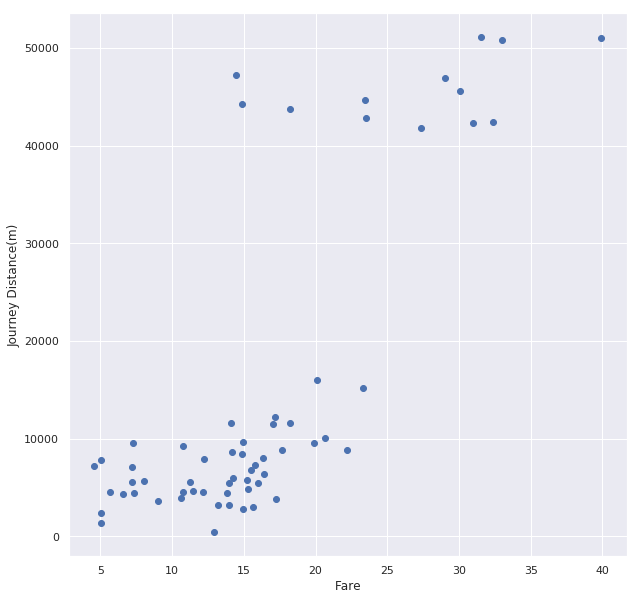

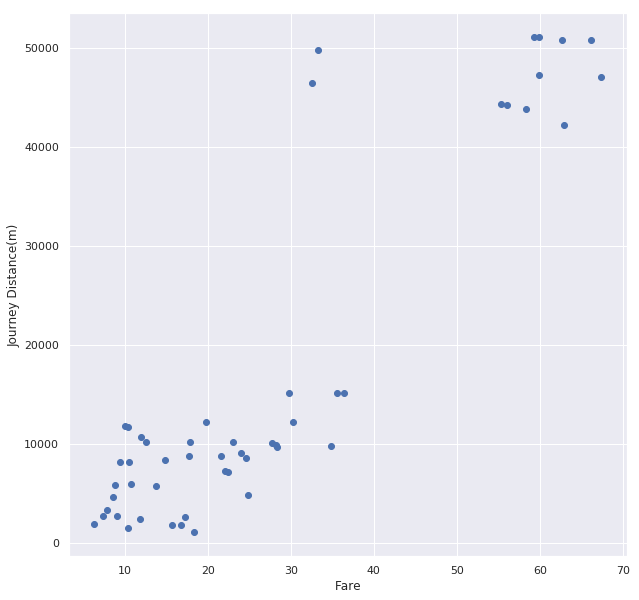

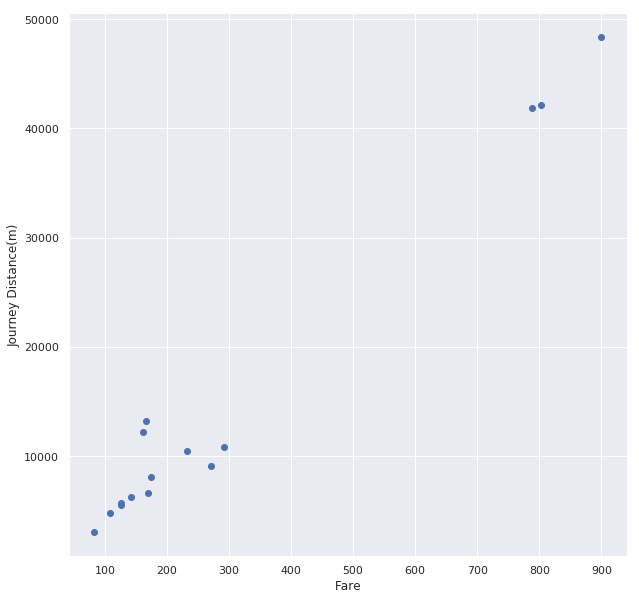

In [85]:
## Plotting for different Uber Types
for utype in [0,1,2]:
    df_tmp = outliers_data[outliers_data['Uber Type'] == utype]
    plt.scatter(df_tmp["Fare$"],df_tmp["Journey Distance(m)"],
               cmap="gray")
    plt.xlabel("Fare")
    plt.ylabel("Journey Distance(m)")
    plt.show()


Text(0.5, 0, 'Journey Distance(m)')

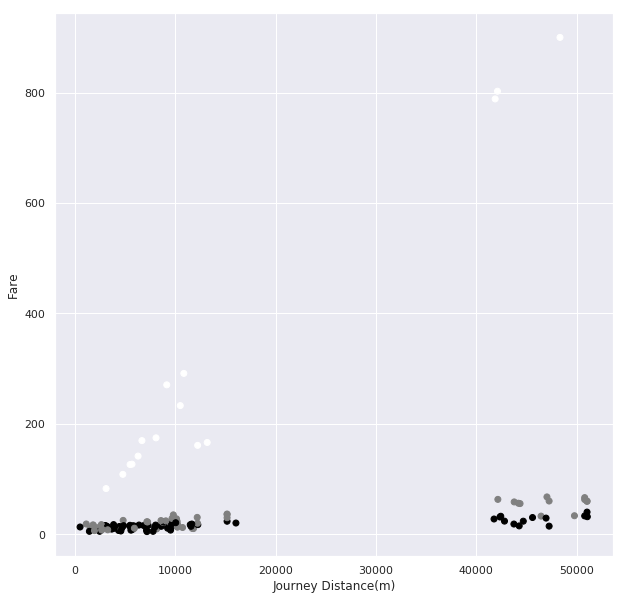

In [86]:
plt.scatter(outliers_data["Journey Distance(m)"],outliers_data["Fare$"],
            c=outliers_data["Uber Type"],cmap="gray")
plt.ylabel("Fare")
plt.xlabel("Journey Distance(m)")

## Outliers Fare 

* We make use of the cleaned dirty data and the cleaned missing data to calculate our fare.
* Then we predict the fare by building 3 linear models.
* We calculate the difference between the predicted and the given Fare. 
* We boxplot this difference and remove the values outside the obtained range.

### Methodology

* Build model on 3 Uber Types and then predict the model on training data set i.e. Dirty data and missing data appended.
* Similarly, predict for outliers data.
* Calculate the residuals and append all the three data sets
* Make use of helper column that will help us distinguish between the outlier data and the dirty+missing data.
* Make a boxplot and check for residuals. 
* Remove the outliers and then boxplot again. Remove the outliers iteratively.
* After removing the outliers, filter the outliers data set and write the output file

### We perform a similar approach as we did in missing data. We add helper columns of weekend and time frame to help build our model

In [87]:
outliers_data['Departure Time'] =  pd.to_datetime(outliers_data['Departure Time'], format='%H:%M:%S')
outliers_data['time_frame'] = 10

## Classifying the timme frame
for i, row in outliers_data.iterrows():
    if pd.to_datetime("1900-01-01 06:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 11:59:59"):
        outliers_data.loc[i, 'time_frame'] = 0
    elif pd.to_datetime("1900-01-01 12:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 20:59:59"):
        outliers_data.loc[i, 'time_frame'] = 1
    else:
        outliers_data.loc[i, 'time_frame'] = 2

In [88]:
outliers_data['Departure Date'] =  pd.to_datetime(outliers_data['Departure Date'], format='%Y-%m-%d')
outliers_data["day"]=outliers_data["Departure Date"].dt.dayofweek

outliers_data["weekend"]=np.where((outliers_data["day"]==6)|(outliers_data["day"]==7) ,1,0)

outliers_data.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,time_frame,day,weekend
0,ID1183592610,0,3,5,-37.822433,145.007775,-37.814977,144.927502,8841.0,2018-07-23,1900-01-01 21:44:45,2075.76,22:19:20,17.630,2,0,0
1,ID3162500053,1,5,8,-37.815242,144.927617,-37.815834,145.046450,11800.0,2018-07-18,1900-01-01 10:36:59,3274.92,11:31:33,10.065,0,2,0
2,ID3425189195,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-04-13,1900-01-01 02:19:22,4911.60,3:41:13,36.410,2,4,0
3,ID1141248598,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-02-25,1900-01-01 11:40:13,12976.50,15:16:29,31.520,0,6,1
4,ID1781243886,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-03-10,1900-01-01 06:51:14,5320.68,8:19:54,20.080,0,5,0


### Doing the same for all the cleaned missing data and dirty data

In [89]:
missing_data_cleaned.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1323200164,0.0,5,8,-37.800530,144.934364,-37.815834,145.046450,12299.0,2018-01-14,18:04:04,3382.80,19:00:26,15.72
1,ID3469866997,1.0,2,4,-37.817791,144.932188,-37.802798,145.006793,7734.0,2018-03-06,14:40:45,2011.08,15:14:16,17.74
2,ID3432608862,1.0,9,5,-38.110916,144.654173,-37.815116,144.927561,44366.0,2018-02-11,08:34:59,10665.84,11:32:44,53.55
3,ID1773186607,0.0,9,5,-38.110916,144.654173,-37.813246,144.933446,43715.0,2018-01-11,04:30:04,10499.22,7:25:03,26.07
4,ID3420025441,1.0,1,4,-37.815916,144.968887,-37.797445,144.997699,4450.0,2018-05-07,02:51:18,1244.82,3:12:02,22.66


In [90]:
missing_data_cleaned['Departure Time'] =  pd.to_datetime(missing_data_cleaned['Departure Time'], format='%H:%M:%S')
missing_data_cleaned['time_frame'] = 10

## Classifying the timme frame
for i, row in missing_data_cleaned.iterrows():
    if pd.to_datetime("1900-01-01 06:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 11:59:59"):
        missing_data_cleaned.loc[i, 'time_frame'] = 0
    elif pd.to_datetime("1900-01-01 12:00:00") < row['Departure Time'] < pd.to_datetime("1900-01-01 20:59:59"):
        missing_data_cleaned.loc[i, 'time_frame'] = 1
    else:
        missing_data_cleaned.loc[i, 'time_frame'] = 2

In [91]:
missing_data_cleaned['Departure Date'] =  pd.to_datetime(missing_data_cleaned['Departure Date'], format='%Y-%m-%d')
missing_data_cleaned["day"]=missing_data_cleaned["Departure Date"].dt.dayofweek

missing_data_cleaned["weekend"]=np.where((missing_data_cleaned["day"]==6)|(missing_data_cleaned["day"]==7) ,1,0)

missing_data_cleaned.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,time_frame,day,weekend
0,ID1323200164,0.0,5,8,-37.800530,144.934364,-37.815834,145.046450,12299.0,2018-01-14,1900-01-01 18:04:04,3382.80,19:00:26,15.72,1,6,1
1,ID3469866997,1.0,2,4,-37.817791,144.932188,-37.802798,145.006793,7734.0,2018-03-06,1900-01-01 14:40:45,2011.08,15:14:16,17.74,1,1,0
2,ID3432608862,1.0,9,5,-38.110916,144.654173,-37.815116,144.927561,44366.0,2018-02-11,1900-01-01 08:34:59,10665.84,11:32:44,53.55,0,6,1
3,ID1773186607,0.0,9,5,-38.110916,144.654173,-37.813246,144.933446,43715.0,2018-01-11,1900-01-01 04:30:04,10499.22,7:25:03,26.07,2,3,0
4,ID3420025441,1.0,1,4,-37.815916,144.968887,-37.797445,144.997699,4450.0,2018-05-07,1900-01-01 02:51:18,1244.82,3:12:02,22.66,2,0,0


## Appending the dataset

In [92]:
## Appending the dataset
data = missing_data_cleaned.append(dirty_data_cleaned)
outliers_data["pred"]=0
data

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,time_frame,day,weekend
0,ID1323200164,0.0,5,8,-37.800530,144.934364,-37.815834,145.046450,12299,2018-01-14,1900-01-01 18:04:04,3382.80,19:00:26,15.72,1,6,1
1,ID3469866997,1.0,2,4,-37.817791,144.932188,-37.802798,145.006793,7734,2018-03-06,1900-01-01 14:40:45,2011.08,15:14:16,17.74,1,1,0
2,ID3432608862,1.0,9,5,-38.110916,144.654173,-37.815116,144.927561,44366,2018-02-11,1900-01-01 08:34:59,10665.84,11:32:44,53.55,0,6,1
3,ID1773186607,0.0,9,5,-38.110916,144.654173,-37.813246,144.933446,43715,2018-01-11,1900-01-01 04:30:04,10499.22,7:25:03,26.07,2,3,0
4,ID3420025441,1.0,1,4,-37.815916,144.968887,-37.797445,144.997699,4450,2018-05-07,1900-01-01 02:51:18,1244.82,3:12:02,22.66,2,0,0
5,ID3393834272,1.0,5,7,-37.810064,144.930506,-37.861835,144.905716,11758,2018-03-01,1900-01-01 10:20:16,3748.14,11:22:44,19.66,0,3,0
6,ID5251489151,2.0,2,3,-37.817300,144.925797,-37.815984,145.000351,7614,2018-02-16,1900-01-01 00:25:42,1894.02,0:57:16,165.45,2,4,0
7,ID1795023620,0.0,6,5,-37.773845,144.983689,-37.805938,144.929527,8027,2018-01-27,1900-01-01 14:28:10,1808.22,14:58:18,13.22,1,5,0
8,ID3637794855,1.0,3,7,-37.809243,144.978357,-37.861835,144.905716,9294,2018-02-27,1900-01-01 12:15:29,3162.12,13:08:11,25.29,1,1,0
9,ID1456068164,0.0,2,7,-37.823013,144.942022,-37.861835,144.905716,9355,2018-02-10,1900-01-01 19:56:46,3232.68,20:50:38,14.19,1,5,0


In [93]:
## Training data set

d0=data[(data["Uber Type"]==0)]

d1=data[data["Uber Type"]==1]
d2=data[data["Uber Type"]==2]

##  Testing data set

t0=outliers_data[(outliers_data["Uber Type"]==0)]
t1=outliers_data[outliers_data["Uber Type"]==1]
t2=outliers_data[outliers_data["Uber Type"]==2]

In [94]:
## Variables for the three models
dv = d0[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']]
dt = d0['Fare$']

X1 = d1[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']]
y1 = d1['Fare$']
X2 = d2[['weekend', 'time_frame', 'Travel Time(s)','Journey Distance(m)']]
y2 = d2['Fare$']

## We fit three linear regression model for the three different Uber types

* We build a new data frame that will keep all the predictions of the dataset in order to calculate the residuals
* Three models for 3 Uber Types

### Model 1: Uber Type 2

In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X2,y2)
print(lm.score(X2,y2))
pred = lm.predict(t2[['weekend', 'time_frame','Travel Time(s)','Journey Distance(m)']])
t=0
## Imputing values in outliers data
for i in t2.index:
    outliers_data.loc[i,"pred"]=pred[t]
    t+=1

pred_d2 = lm.predict(d2[['weekend', 'time_frame','Travel Time(s)','Journey Distance(m)']])

## Creating a new data frame to append with the final outliers data
z2=data[data["Uber Type"]==2][:]
z2 = z2.reset_index(drop=True)
z2["pred"]=pred_d2


0.9891610677993783


### Model 2: Uber Type 1

In [96]:
lm = LinearRegression()
lm.fit(X1,y1)
print(lm.score(X1,y1))
pred = lm.predict(t1[['weekend', 'time_frame','Travel Time(s)','Journey Distance(m)']])
print(pred)
t=0
## Imputing values in outliers data
for i in t1.index:
    outliers_data.loc[i,"pred"]=pred[t]
    t+=1
## Creating a new column for training residuals
pred_d1 = lm.predict(d1[['weekend', 'time_frame','Travel Time(s)','Journey Distance(m)']])
z1=data[data["Uber Type"]==1][:]
z1 = z1.reset_index(drop=True)
z1["pred"]=pred_d1
len(pred_d1)
shape(z1)

0.9091671307506876
[22.27072403 31.88342114 15.43568144 59.07866315 50.24948766 19.33131571
 19.20476785 53.36612426 51.07783926 21.68608578 31.91056291 24.89700225
 12.64368429 24.52879517 15.17490025 16.30892854 18.76436232 56.9334605
 19.02633025 13.41352342 14.50995891 22.77279483 25.72885013 23.42433809
 14.93956714 56.6058677  56.6058677  51.0044843  23.9999495  54.7839061
 50.46054756 16.86261255 25.52959243 14.54196457 24.52718053 19.87208983
 19.68548708 22.47316478 12.31356229 26.67876124 22.05692424 20.26293538
 13.81220002 11.69896348 19.65422189 15.21292984 30.49371255 22.00578031
 58.93270687 12.75408773 55.95357686]


(151, 18)

In [97]:
k1=outliers_data[outliers_data["Uber Type"]==0]

### Model 3: Uber Type 0

In [98]:
lm = LinearRegression()
lm.fit(dv,dt)
print(lm.score(dv,dt))
pred = lm.predict(k1[['weekend', 'time_frame','Travel Time(s)','Journey Distance(m)']])
print(pred)
t=0
## Imputing values in outliers data
for i in k1.index:
    outliers_data.loc[i,"pred"]=pred[t]
    t+=1
    
pred_d0 = lm.predict(d0[['weekend', 'time_frame','Travel Time(s)','Journey Distance(m)']])
z0=data[data["Uber Type"]==0][:]
z0 = z0.reset_index(drop=True)
z0["pred"]=pred_d0
shape(z0)


0.6003756932076163
[10.97352904 25.37692268 15.05727563 12.78174661  9.88438263 10.67381341
 18.85021489 10.45827825 10.18289948  9.63145545  9.62104576 10.07298096
 10.14636573 19.83465064 12.93305676  9.89241841 10.07223441 10.58224117
  9.9790439  10.27395572 10.72935802 12.17260342 15.18000117  9.59456543
 21.96444854  9.88015445 13.08513824 19.09378502 18.43891115 12.21018937
 10.96775844 10.55595041  9.92513002 19.21824972  9.72385016  9.72057064
 13.46485044 13.61555413 12.34553427 13.2067771  10.1664703  18.57106867
  9.06643254 11.68567873  9.51934263 19.32332903 23.05076672  8.87333106
 12.05767371 13.82176414  8.68072341  9.39990816  9.55347164  9.68037626
 10.08161226 22.18375902 10.72602703 22.73034419 19.50802134 16.7885593
 13.5181145 ]


(205, 18)

In [99]:
## Calculating the residuals for the new data set 
outliers_data["residuals"]=outliers_data["Fare$"]-outliers_data["pred"]
outliers_data.head()


,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,time_frame,day,weekend,pred,residuals
0,ID1183592610,0,3,5,-37.822433,145.007775,-37.814977,144.927502,8841.0,2018-07-23,1900-01-01 21:44:45,2075.76,22:19:20,17.630,2,0,0,10.973529,6.656471
1,ID3162500053,1,5,8,-37.815242,144.927617,-37.815834,145.046450,11800.0,2018-07-18,1900-01-01 10:36:59,3274.92,11:31:33,10.065,0,2,0,22.270724,-12.205724
2,ID3425189195,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-04-13,1900-01-01 02:19:22,4911.60,3:41:13,36.410,2,4,0,31.883421,4.526579
3,ID1141248598,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-02-25,1900-01-01 11:40:13,12976.50,15:16:29,31.520,0,6,1,25.376923,6.143077
4,ID1781243886,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-03-10,1900-01-01 06:51:14,5320.68,8:19:54,20.080,0,5,0,15.057276,5.022724


In [100]:
## Making a data set that contains all the outliers,missing and dirty data
z4=z0.append(z1, ignore_index=True)
z5=z4.append(z2,ignore_index=True)

## Helper column to distinguish between the dirty,missing data and the outlier data
z5["train"]="train"
z5["residuals"]=z5["Fare$"]-z5["pred"]
outliers_data["train"]="outliers"

### Creating the data set to remove the residuals

In [101]:
full_data=z5.append(outliers_data,ignore_index=True,sort=True)

In [102]:
full_data

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Id,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,day,pred,residuals,time_frame,train,weekend
0,19:00:26,2018-01-14,1900-01-01 18:04:04,-37.815834,145.046450,8,15.720,ID1323200164,12299,-37.800530,144.934364,5,3382.80,0.0,6,15.954551,-0.234551,1,train,1
1,7:25:03,2018-01-11,1900-01-01 04:30:04,-37.813246,144.933446,5,26.070,ID1773186607,43715,-38.110916,144.654173,9,10499.22,0.0,3,19.355790,6.714210,2,train,0
2,14:58:18,2018-01-27,1900-01-01 14:28:10,-37.805938,144.929527,5,13.220,ID1795023620,8027,-37.773845,144.983689,6,1808.22,0.0,5,10.264074,2.955926,1,train,0
3,20:50:38,2018-02-10,1900-01-01 19:56:46,-37.861835,144.905716,7,14.190,ID1456068164,9355,-37.823013,144.942022,2,3232.68,0.0,5,12.846499,1.343501,1,train,0
4,8:46:46,2018-07-10,1900-01-01 07:42:20,-37.861835,144.905716,7,9.560,ID1968309777,11711,-37.790797,144.985865,6,3866.94,0.0,1,13.178104,-3.618104,0,train,0
5,16:25:37,2018-07-13,1900-01-01 15:59:54,-37.822932,145.010629,3,8.290,ID1206646527,6349,-37.817342,144.946281,2,1543.56,0.0,4,10.149156,-1.859156,1,train,0
6,0:48:57,2018-07-04,1900-01-01 00:25:30,-37.811350,145.000987,4,12.360,ID1335625412,5261,-37.815724,144.950094,1,1407.96,0.0,2,10.516833,1.843167,2,train,0
7,16:48:14,2018-03-17,1900-01-01 16:25:16,-37.773845,144.983689,6,10.390,ID1200246822,6152,-37.822747,144.966779,3,1378.14,0.0,5,9.860170,0.529830,1,train,0
8,5:57:42,2018-07-09,1900-01-01 02:44:05,-37.805286,145.005331,4,26.660,ID1897418244,47761,-38.110916,144.654173,9,11617.44,0.0,0,20.617310,6.042690,2,train,0
9,14:46:58,2018-02-16,1900-01-01 13:18:15,-37.861835,144.905716,7,15.980,ID1276995841,16033,-37.773803,144.983647,6,5323.56,0.0,4,15.431543,0.548457,1,train,0


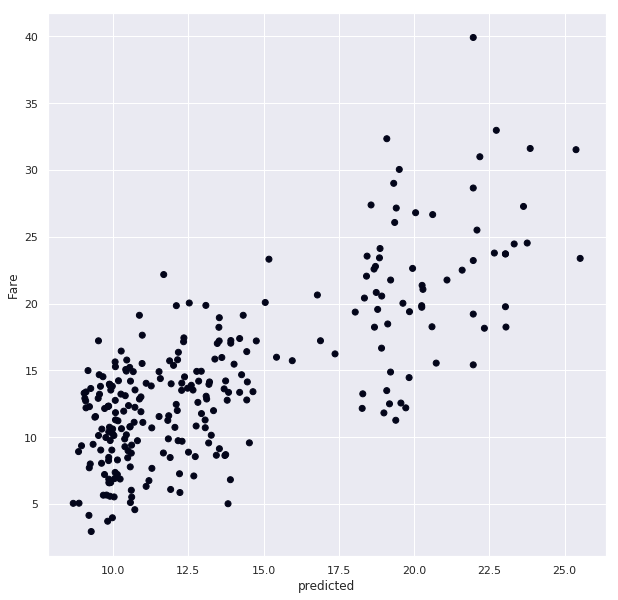

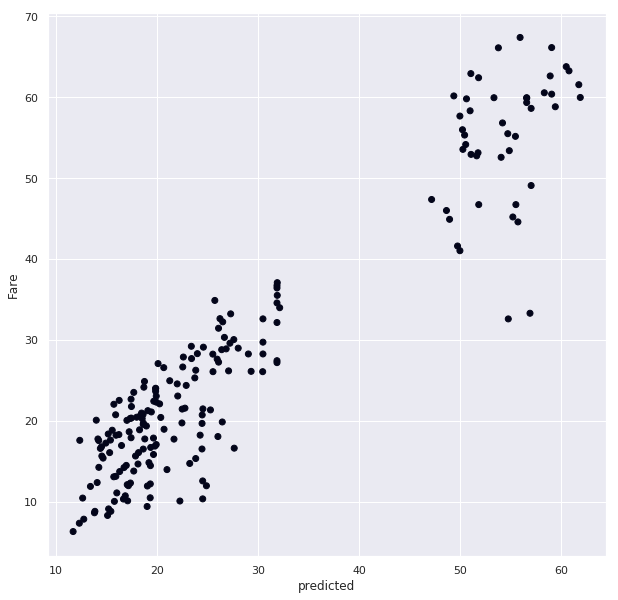

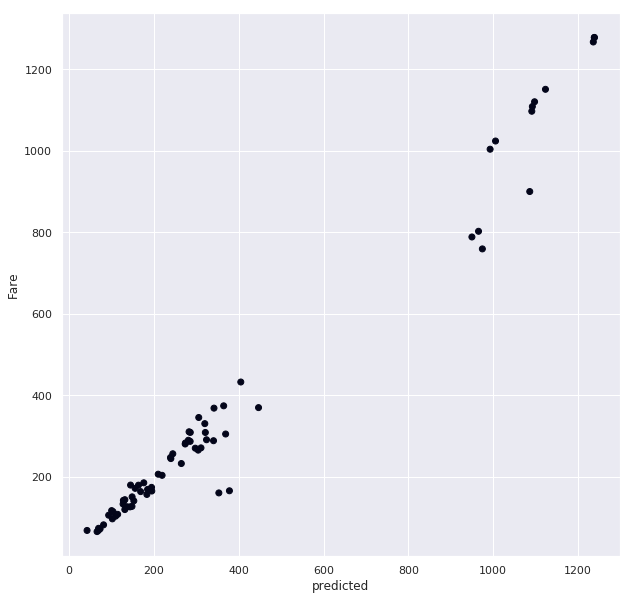

In [103]:
for i in [0,1,2]:
    df_tmp=full_data[(full_data["Uber Type"]==i)]
    plt.scatter(df_tmp["pred"],df_tmp["Fare$"],c=df_tmp["Uber Type"])
    plt.xlabel("predicted")
    plt.ylabel("Fare")
    plt.show()

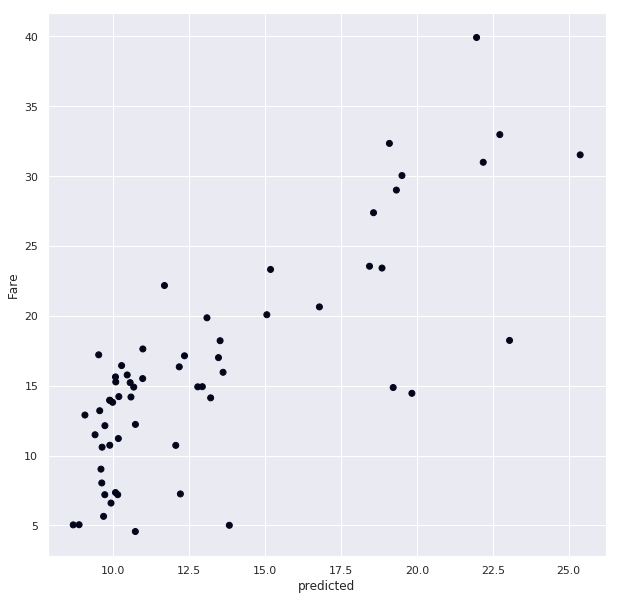

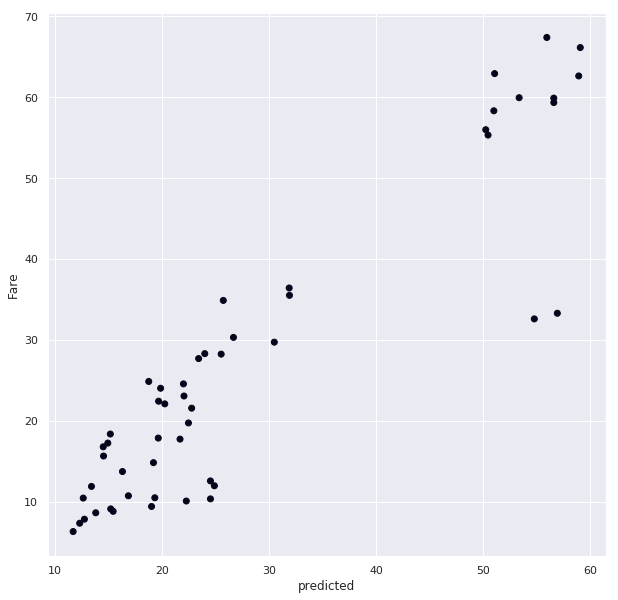

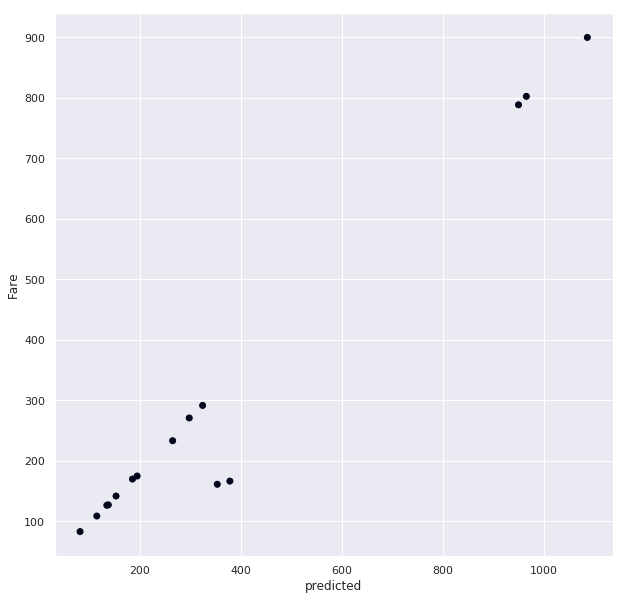

In [104]:
for i in [0,1,2]:
    df_tmp=full_data[(full_data["train"]=="outliers")&(full_data["Uber Type"]==i)]
    plt.scatter(df_tmp["pred"],df_tmp["Fare$"],c=df_tmp["Uber Type"])
    plt.xlabel("predicted")
    plt.ylabel("Fare")
    plt.show()

In [105]:
df_tmp=full_data[(full_data["train"]=="outliers")&(full_data["Uber Type"]==2)]
df_tmp[df_tmp["residuals"]<-70]

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Id,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,day,pred,residuals,time_frame,train,weekend
445,9:22:12,2018-04-27,1900-01-01 06:07:57,-38.110916,144.654173,9,900.000,ID5412212605,48334,-37.810811,145.011151,4,11655.84,2.0,4,1086.347976,-186.347976,0,outliers,0
460,3:22:24,2018-04-26,1900-01-01 00:33:49,-38.110916,144.654173,9,802.500,ID5819745878,42103,-37.821709,144.948702,2,10115.52,2.0,3,965.491595,-162.991595,2,outliers,0
464,23:12:07,2018-01-14,1900-01-01 22:07:41,-37.861835,144.905716,7,166.035,ID5196820875,13169,-37.773845,144.983689,6,3866.46,2.0,6,377.898746,-211.863746,2,outliers,1
476,19:35:56,2018-02-10,1900-01-01 18:31:46,-37.810218,145.009017,4,160.815,ID5591365882,12215,-37.861835,144.905716,7,3850.80,2.0,5,352.935383,-192.120383,1,outliers,0
538,20:59:36,2018-04-27,1900-01-01 18:11:44,-38.110916,144.654173,9,788.540,ID5231850140,41873,-37.820927,144.947574,2,10072.20,2.0,4,949.913053,-161.373053,1,outliers,0


In [106]:
df_tmp=full_data[(full_data["train"]=="outliers")&(full_data["Uber Type"]==1)]
df_tmp[df_tmp["residuals"]<-20]

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Id,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,day,pred,residuals,time_frame,train,weekend
449,23:23:57,2018-07-15,1900-01-01 20:02:48,-38.110916,144.654173,9,33.285,ID3909354220,49777,-37.807202,145.026637,8,12069.78,1.0,6,56.933460,-23.648460,1,outliers,1
489,7:25:17,2018-07-08,1900-01-01 04:19:47,-38.110916,144.654173,9,32.585,ID3848856218,46448,-37.819825,144.995435,3,11130.18,1.0,6,54.783906,-22.198906,2,outliers,1


In [107]:
df_tmp=full_data[(full_data["train"]=="outliers")&(full_data["Uber Type"]==0)]
df_tmp[df_tmp["residuals"]>13]

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Id,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,day,pred,residuals,time_frame,train,weekend
472,3:43:03,2018-02-24,1900-01-01 00:11:42,-38.110916,144.654173,9,39.92,ID1367237296,51032,-37.815834,145.046450,8,12681.06,0.0,5,21.964449,17.955551,2,outliers,0
480,3:10:47,2018-06-27,1900-01-01 00:20:36,-37.818826,144.953157,1,32.34,ID1649341714,42432,-38.110916,144.654173,9,10211.94,0.0,2,19.093785,13.246215,2,outliers,0


### Boxplot to check for outliers

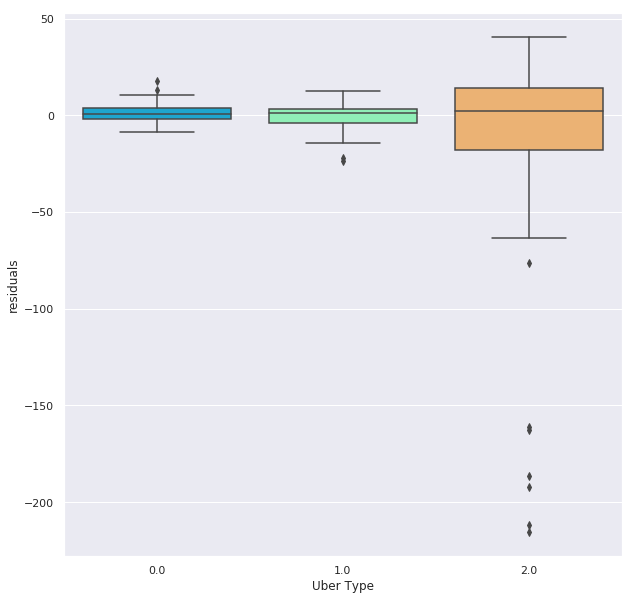

In [108]:
sns.boxplot(x="Uber Type", y="residuals", data=full_data,palette='rainbow')

In [109]:
outliers_data[(outliers_data["Uber Type"]==2) & (outliers_data["residuals"]<-100)]

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,time_frame,day,weekend,pred,residuals,train
32,ID5412212605,2,4,9,-37.810811,145.011151,-38.110916,144.654173,48334.0,2018-04-27,1900-01-01 06:07:57,11655.84,9:22:12,900.000,0,4,0,1086.347976,-186.347976,outliers
47,ID5819745878,2,2,9,-37.821709,144.948702,-38.110916,144.654173,42103.0,2018-04-26,1900-01-01 00:33:49,10115.52,3:22:24,802.500,2,3,0,965.491595,-162.991595,outliers
51,ID5196820875,2,6,7,-37.773845,144.983689,-37.861835,144.905716,13169.0,2018-01-14,1900-01-01 22:07:41,3866.46,23:12:07,166.035,2,6,1,377.898746,-211.863746,outliers
63,ID5591365882,2,7,4,-37.861835,144.905716,-37.810218,145.009017,12215.0,2018-02-10,1900-01-01 18:31:46,3850.80,19:35:56,160.815,1,5,0,352.935383,-192.120383,outliers
125,ID5231850140,2,2,9,-37.820927,144.947574,-38.110916,144.654173,41873.0,2018-04-27,1900-01-01 18:11:44,10072.20,20:59:36,788.540,1,4,0,949.913053,-161.373053,outliers


As the box plot shows we do not have outliers for Uber Type 2. We have a few outliers for Uber Type 1 and Uber Type 0

### We calculate the interquartile range and remove the outliers accordingly

The below code is referenced from the site:
* Title: Three ways to detect outliers
* URL: http://colingorrie.github.io/outlier-detection.html
* Date Retrieved: 18/05/2019

In [110]:
## Function to remove the outliers using IQR
def outlier_remover(df,utype):
    q75, q25 = np.percentile(df[df["Uber Type"]==utype].residuals, [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    for i in df[(df["Uber Type"]==utype) & (df["residuals"]>max)].index:
        
        df.drop(i,axis=0,inplace=True)
    for i in df[(df["Uber Type"]==utype) & (df["residuals"]<min)].index:
        df.drop(i,axis=0,inplace=True)
    return df

In [111]:
## Removing the outliers
for i in [0,1,2]:
    outlier_remover(full_data,i)


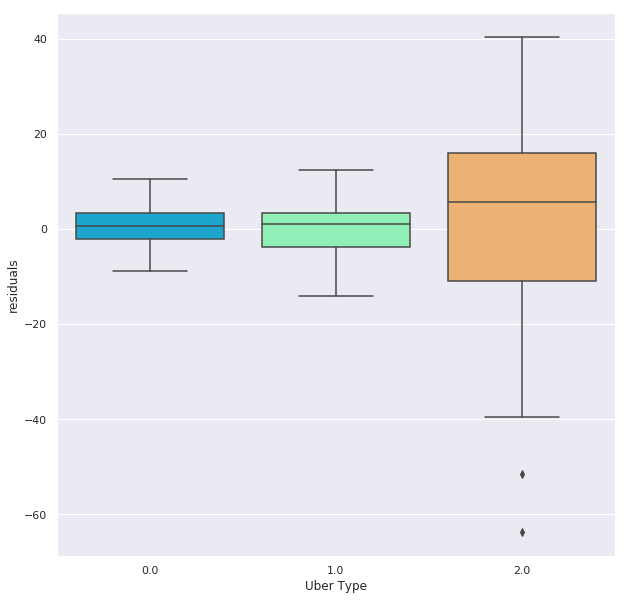

In [112]:
## Plotting to verify
sns.boxplot(x="Uber Type", y="residuals", data=full_data,palette='rainbow')

In [113]:
### Iterating to again remove the outliers
for i in [0,1,2]:
    outlier_remover(full_data,i)

## After Removing the outliers we have a cleaned data file¶

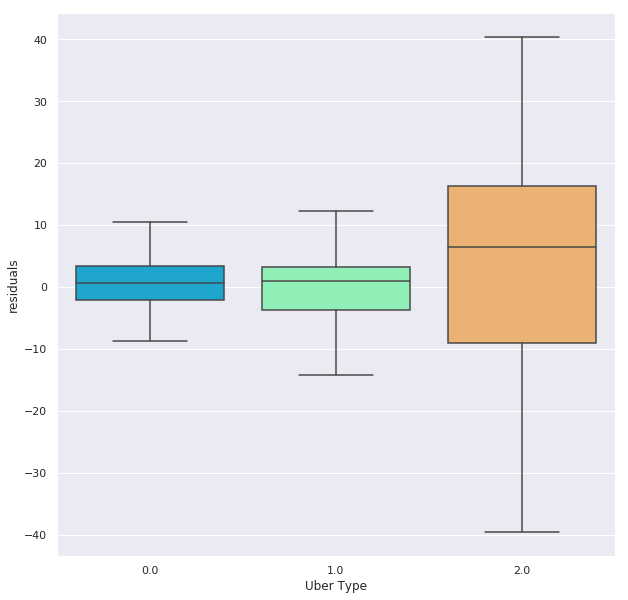

In [114]:
## Plotting to verify
sns.boxplot(x="Uber Type", y="residuals", data=full_data,palette='rainbow')

In [115]:
## Creaing the final csv file
full_data=full_data[list(outliers_data.columns)]
full_data=full_data[full_data["train"]=="outliers"]

## Dropping and resetting index
outliers_data_cleaned=full_data.iloc[:,0:14].reset_index(drop=True)


In [116]:
### Renaming the columns to particular format
outliers_data_cleaned=full_data.iloc[:,0:14].reset_index(drop=True)
## Departure date
outliers_data_cleaned["Departure Date"]=outliers_data_cleaned["Departure Date"].astype(str)

## Departure Time
outliers_data_cleaned["Departure Time"]=outliers_data_cleaned["Departure Time"].astype(str)
outliers_data_cleaned["Departure Time"]=outliers_data_cleaned["Departure Time"].str[11:]

In [117]:
shape(outliers_data_cleaned)

(118, 14)

In [118]:
outliers_data_cleaned.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1183592610,0.0,3,5,-37.822433,145.007775,-37.814977,144.927502,8841,2018-07-23,21:44:45,2075.76,22:19:20,17.630
1,ID3162500053,1.0,5,8,-37.815242,144.927617,-37.815834,145.046450,11800,2018-07-18,10:36:59,3274.92,11:31:33,10.065
2,ID3425189195,1.0,7,8,-37.861835,144.905716,-37.815834,145.046450,15151,2018-04-13,02:19:22,4911.60,3:41:13,36.410
3,ID1141248598,0.0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061,2018-02-25,11:40:13,12976.50,15:16:29,31.520
4,ID1781243886,0.0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033,2018-03-10,06:51:14,5320.68,8:19:54,20.080


In [119]:
outliers_data_cleaned.dtypes

Id                        object
Uber Type                float64
Origin Region              int64
Destination Region         int64
Origin Latitude          float64
Origin Longitude         float64
Destination Latitude     float64
Destination Longitude    float64
Journey Distance(m)       object
Departure Date            object
Departure Time            object
Travel Time(s)           float64
Arrival Time              object
Fare$                    float64
dtype: object

### Writing the cleaned Data

In [120]:
## Writing the csv file
outliers_data_cleaned.to_csv("29389429_outliers_solution.csv", sep=',',index=False)

## References
    * Martin Muesli (September, 2018)"Pandas: Conditionally replace values based on other columns values" 
https://stackoverflow.com/questions/52224142/pandas-conditionally-replace-values-based-on-other-columns-values
    * Punter Vicky (June,2018)"Python3 Date Validation"
https://stackoverflow.com/questions/50648096/python3-date-validation
    * Colin Gorrie (March,2016) "Three ways to detect outliers"
http://colingorrie.github.io/outlier-detection.html
    * Kiamlaluno (December,2009)"Convert date to datetime in Python"
https://stackoverflow.com/questions/1937622/convert-date-to-datetime-in-python
    * Rahul Saxena (December,2016)"KNN SKLEARN, K-NEAREST NEIGHBOR IMPLEMENTATION WITH SCIKIT LEARN"
https://dataaspirant.com/2016/12/30/k-nearest-neighbor-implementation-scikit-learn/